### Introduction

### Implementation

At first, we import 'Pandas' library that we need to load data:

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [175]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


feature 'Id' is unique, so we drop it...

In [176]:
train_house_id = train_data['Id']
test_house_id = test_data['Id']
train_data = train_data.drop(columns=['Id'])
test_data = test_data.drop(columns=['Id'])

In [177]:
non_numerical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                          'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                          'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                          'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                          'BsmtExposure', 'BsmtFinType1', 'Heating', 'BsmtFinType2', 'HeatingQC',
                          'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                          'PoolQC', 'Fence', 'SaleType', 'SaleCondition', 'MiscFeature']

continuous_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

### Distribution/Relationship

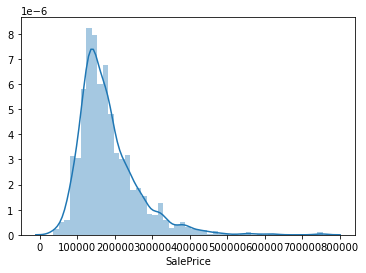

In [178]:
sns.distplot(train_data['SalePrice'])

'SalePrice' is like normal-distribution!

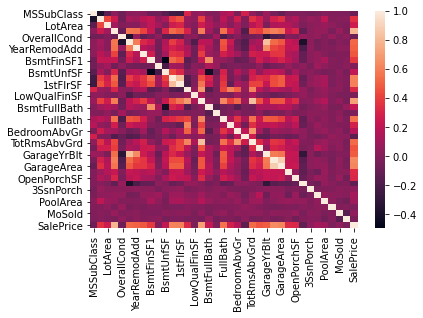

In [179]:
correlation = train_data.corr()
sns.heatmap(correlation)

By heatmap, you can see the correlation of between features. 'MiscFeature' have the lowest correlation with 'SalePrice', but we don't drop it because this action will reduce accuracy of our model.

### Label-Encoding

I tried to encode labels without functions like 'LabelEncoder'. Because I can control values easier...

In [180]:
index = 0
for feature in non_numerical_features:
    for key in train_data[feature].value_counts().keys():
        train_data[feature] = train_data[feature].replace(key, index)
        index += 1
    index = 0

for feature in non_numerical_features:
    for key in test_data[feature].value_counts().keys():
        test_data[feature] = test_data[feature].replace(key, index)
        index += 1
    index = 0

### Dealing with missing-values

In [181]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          91 non-null     float64
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

For importing 'IterativeImputer', we need to import 'enable_iterative_imputer' at first:

In [182]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [183]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,NaN,0,0,0,0,...,0,NaN,NaN,NaN,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,NaN,0,0,0,3,...,0,NaN,NaN,NaN,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,NaN,1,0,0,0,...,0,NaN,NaN,NaN,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,NaN,1,0,0,1,...,0,NaN,NaN,NaN,0,2,2006,0,2,140000
4,60,0,84.0,14260,0,NaN,1,0,0,3,...,0,NaN,NaN,NaN,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,NaN,0,0,0,0,...,0,NaN,NaN,NaN,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,NaN,0,0,0,0,...,0,NaN,0.0,NaN,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,NaN,0,0,0,0,...,0,NaN,1.0,0.0,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,NaN,0,0,0,0,...,0,NaN,NaN,NaN,0,4,2010,0,0,142125


In [184]:
train_data.loc[:, 'MSSubClass':'SaleCondition'] = IterativeImputer().fit_transform(train_data.loc[:, 'MSSubClass':'SaleCondition'])
test_data.loc[:, 'MSSubClass':'SaleCondition'] = IterativeImputer().fit_transform(test_data.loc[:, 'MSSubClass':'SaleCondition'])

In [185]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,0.0,65.0,8450.0,0.0,0.585449,0.0,0.0,0.0,0.0,...,0.0,0.848476,0.809386,0.218505,0.0,2.0,2008.0,0.0,0.0,208500
1,20.0,0.0,80.0,9600.0,0.0,0.390320,0.0,0.0,0.0,3.0,...,0.0,0.613280,0.740309,-0.175913,0.0,5.0,2007.0,0.0,0.0,181500
2,60.0,0.0,68.0,11250.0,0.0,0.500804,1.0,0.0,0.0,0.0,...,0.0,0.167193,0.769642,0.147692,0.0,9.0,2008.0,0.0,0.0,223500
3,70.0,0.0,60.0,9550.0,0.0,0.441101,1.0,0.0,0.0,1.0,...,0.0,0.013185,0.652357,-0.010254,0.0,2.0,2006.0,0.0,2.0,140000
4,60.0,0.0,84.0,14260.0,0.0,0.558442,1.0,0.0,0.0,3.0,...,0.0,0.217639,0.862978,-0.018093,0.0,12.0,2008.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,0.0,62.0,7917.0,0.0,0.643072,0.0,0.0,0.0,0.0,...,0.0,-0.990960,0.475319,0.043806,0.0,8.0,2007.0,0.0,0.0,175000
1456,20.0,0.0,85.0,13175.0,0.0,0.444354,0.0,0.0,0.0,0.0,...,0.0,0.527777,0.000000,-0.122240,0.0,2.0,2010.0,0.0,0.0,210000
1457,70.0,0.0,66.0,9042.0,0.0,-0.438692,0.0,0.0,0.0,0.0,...,0.0,-0.283939,1.000000,0.000000,2500.0,5.0,2010.0,0.0,0.0,266500
1458,20.0,0.0,68.0,9717.0,0.0,-0.481957,0.0,0.0,0.0,0.0,...,0.0,2.387243,0.744697,0.980880,0.0,4.0,2010.0,0.0,0.0,142125


### Normalization

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
normalizer = MinMaxScaler(feature_range=(0, 1))
train_data[continuous_features] = normalizer.fit_transform(train_data[continuous_features])

In [188]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,0.0,0.150685,0.033420,0.0,0.585449,0.0,0.0,0.0,0.0,...,0.0,0.848476,0.809386,0.218505,0.00000,2.0,2008.0,0.0,0.0,208500
1,20.0,0.0,0.202055,0.038795,0.0,0.390320,0.0,0.0,0.0,3.0,...,0.0,0.613280,0.740309,-0.175913,0.00000,5.0,2007.0,0.0,0.0,181500
2,60.0,0.0,0.160959,0.046507,0.0,0.500804,1.0,0.0,0.0,0.0,...,0.0,0.167193,0.769642,0.147692,0.00000,9.0,2008.0,0.0,0.0,223500
3,70.0,0.0,0.133562,0.038561,0.0,0.441101,1.0,0.0,0.0,1.0,...,0.0,0.013185,0.652357,-0.010254,0.00000,2.0,2006.0,0.0,2.0,140000
4,60.0,0.0,0.215753,0.060576,0.0,0.558442,1.0,0.0,0.0,3.0,...,0.0,0.217639,0.862978,-0.018093,0.00000,12.0,2008.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,0.0,0.140411,0.030929,0.0,0.643072,0.0,0.0,0.0,0.0,...,0.0,-0.990960,0.475319,0.043806,0.00000,8.0,2007.0,0.0,0.0,175000
1456,20.0,0.0,0.219178,0.055505,0.0,0.444354,0.0,0.0,0.0,0.0,...,0.0,0.527777,0.000000,-0.122240,0.00000,2.0,2010.0,0.0,0.0,210000
1457,70.0,0.0,0.154110,0.036187,0.0,-0.438692,0.0,0.0,0.0,0.0,...,0.0,-0.283939,1.000000,0.000000,0.16129,5.0,2010.0,0.0,0.0,266500
1458,20.0,0.0,0.160959,0.039342,0.0,-0.481957,0.0,0.0,0.0,0.0,...,0.0,2.387243,0.744697,0.980880,0.00000,4.0,2010.0,0.0,0.0,142125


Now we're ready to use machine learning algorithms

### Cross-Validation

At this step, we use cross_val_score to get R-Squared score

### LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [138]:
X = train_data.loc[:, 'MSSubClass':'SaleCondition']
y = train_data.loc[:, 'SalePrice']

In [19]:
linear = LinearRegression()
linear_predicted = cross_val_score(linear, X, y, cv=10, scoring='r2')
print(f'LinearRegression: {linear_predicted.mean()}')

LinearRegression: 0.8031698258850746


### GradientBoosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
gbr = GradientBoostingRegressor(n_estimators=500, alpha=0.9)
gbr_predicted = cross_val_score(gbr, X, y, cv=10, scoring='r2')
print(f'GradientBoosting: {gbr_predicted.mean()}')

GradientBoosting: 0.8992224229253205


### DecisionTree

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dtr = DecisionTreeRegressor()
dtr_predicted = cross_val_score(dtr, X, y, cv=10, scoring='r2')
print(f'DecisionTree: {dtr_predicted.mean()}')

DecisionTree: 0.7655263135837959


### RandomForest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfr = RandomForestRegressor(n_estimators=700)
rfr_predicted = cross_val_score(rfr, X, y, cv=10, scoring='r2')
print(f'RandomForest: {rfr_predicted.mean()}')

RandomForest: 0.8631120199638772


### LASSO

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lr = Lasso(max_iter=10000)
lr_predicted = cross_val_score(lr, X, y, cv=10, scoring='r2')
print(f'Lasso: {lr_predicted.mean()}')

Lasso: 0.8036670773510144


### Ridge

In [28]:
from sklearn.linear_model import Ridge

In [29]:
rr = Ridge(max_iter=10000)
rr_predicted = cross_val_score(rr, X, y, cv=10, scoring='r2')
print(f'Ridge: {rr_predicted.mean()}')

Ridge: 0.8087353648513425


### SVR

In [30]:
from sklearn.svm import SVR

In [35]:
svr = SVR(kernel='linear', C=500)
svr_predicted = cross_val_score(svr, X, y, cv=10, scoring='r2')
print(f'SVR: {svr_predicted.mean()}')

SVR: 0.7910265801577581


### NeuralNetwork

I tried different neural networks. Finally I chosed 2 hiddenlayers + 500 neurons inside each of them...

In [36]:
from sklearn.neural_network import MLPRegressor

In [38]:
mlp = MLPRegressor(hidden_layer_sizes=(500, 500), activation='relu', max_iter=3000)
mlp_predicted = cross_val_score(mlp, X, y, cv=10, scoring='r2')
print(f'MLP: {mlp_predicted.mean()}')

MLP: 0.7983274461820443


### Visualization

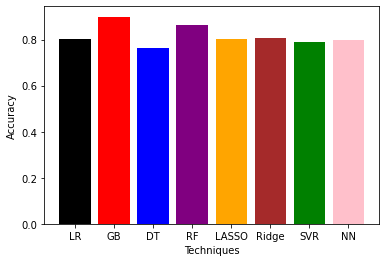

In [155]:
x = ['LR', 'GB', 'DT', 'RF', 'LASSO', 'Ridge', 'SVR', 'NN']
height = [linear_predicted.mean(), gbr_predicted.mean(), dtr_predicted.mean(), rfr_predicted.mean(), lr_predicted.mean(), rr_predicted.mean(), svr_predicted.mean(), mlp_predicted.mean()]
color = ['black', 'red', 'blue', 'purple', 'orange', 'brown', 'green', 'pink']

plt.xlabel('Techniques')
plt.ylabel('Accuracy')
plt.bar(x=x, height=height, color=color)
plt.show()

As you can see, GradientBoosing have the highest accuracy (R-Squared score).

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [157]:
X = train_data.loc[:, 'MSSubClass':'SaleCondition']
y = train_data.loc[:, 'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [197]:
gbr = GradientBoostingRegressor(n_estimators=500, alpha=0.9)
gbr.fit(X_train, y_train)
predicted = gbr.predict(X_test)

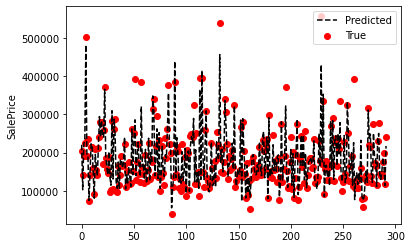

R-Squared: 0.9008901548989896


In [199]:
x = range(len(y_test))
plt.scatter(x, y_test, color='red')
plt.ylabel('SalePrice')
plt.plot(x, predicted, 'k--')
plt.legend(['Predicted', 'True'])
plt.show()
print(f'R-Squared: {r2_score(y_test, predicted)}')

### Test_Data prediction

In [200]:
X_for_test = train_data.loc[:, 'MSSubClass':'SaleCondition']
y_for_test = train_data.loc[:, 'SalePrice']

gbr = GradientBoostingRegressor(n_estimators=500, alpha=0.9)
gbr.fit(X_for_test, y_for_test)

predicted = gbr.predict(test_data)

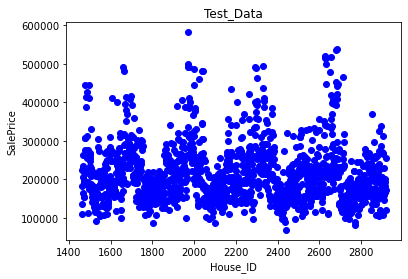

In [201]:
plt.title('Test_Data')
plt.xlabel('House_ID')
plt.ylabel('SalePrice')
plt.scatter(test_house_id, predicted, color='blue')
plt.show()